In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/dataset.csv')

print(df.head())

   Year  Month          Sector  Hydroelectric Power  Geothermal Energy  \
0  1973      1      Commerical                 0.00               0.00   
1  1973      1  Electric Power                 0.00               0.49   
2  1973      1      Industrial                 1.04               0.00   
3  1973      1     Residential                 0.00               0.00   
4  1973      1  Transportation                 0.00               0.00   

   Solar Energy  Wind Energy  Wood Energy  Waste Energy  \
0           0.0          0.0        0.570         0.000   
1           0.0          0.0        0.054         0.157   
2           0.0          0.0       98.933         0.000   
3           0.0          0.0       30.074         0.000   
4           0.0          0.0        0.000         0.000   

   Fuel Ethanol, Excluding Denaturant  Biomass Losses and Co-products  \
0                                 0.0                             0.0   
1                                 0.0                 

In [ ]:
df.info()

print(df.describe())

for column in df.columns:
    print(f"Column '{column}': {df[column].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Numerical columns: ['Year', 'Month', 'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Biomass Energy', 'Total Renewable Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']
Categorical columns: ['Sector']


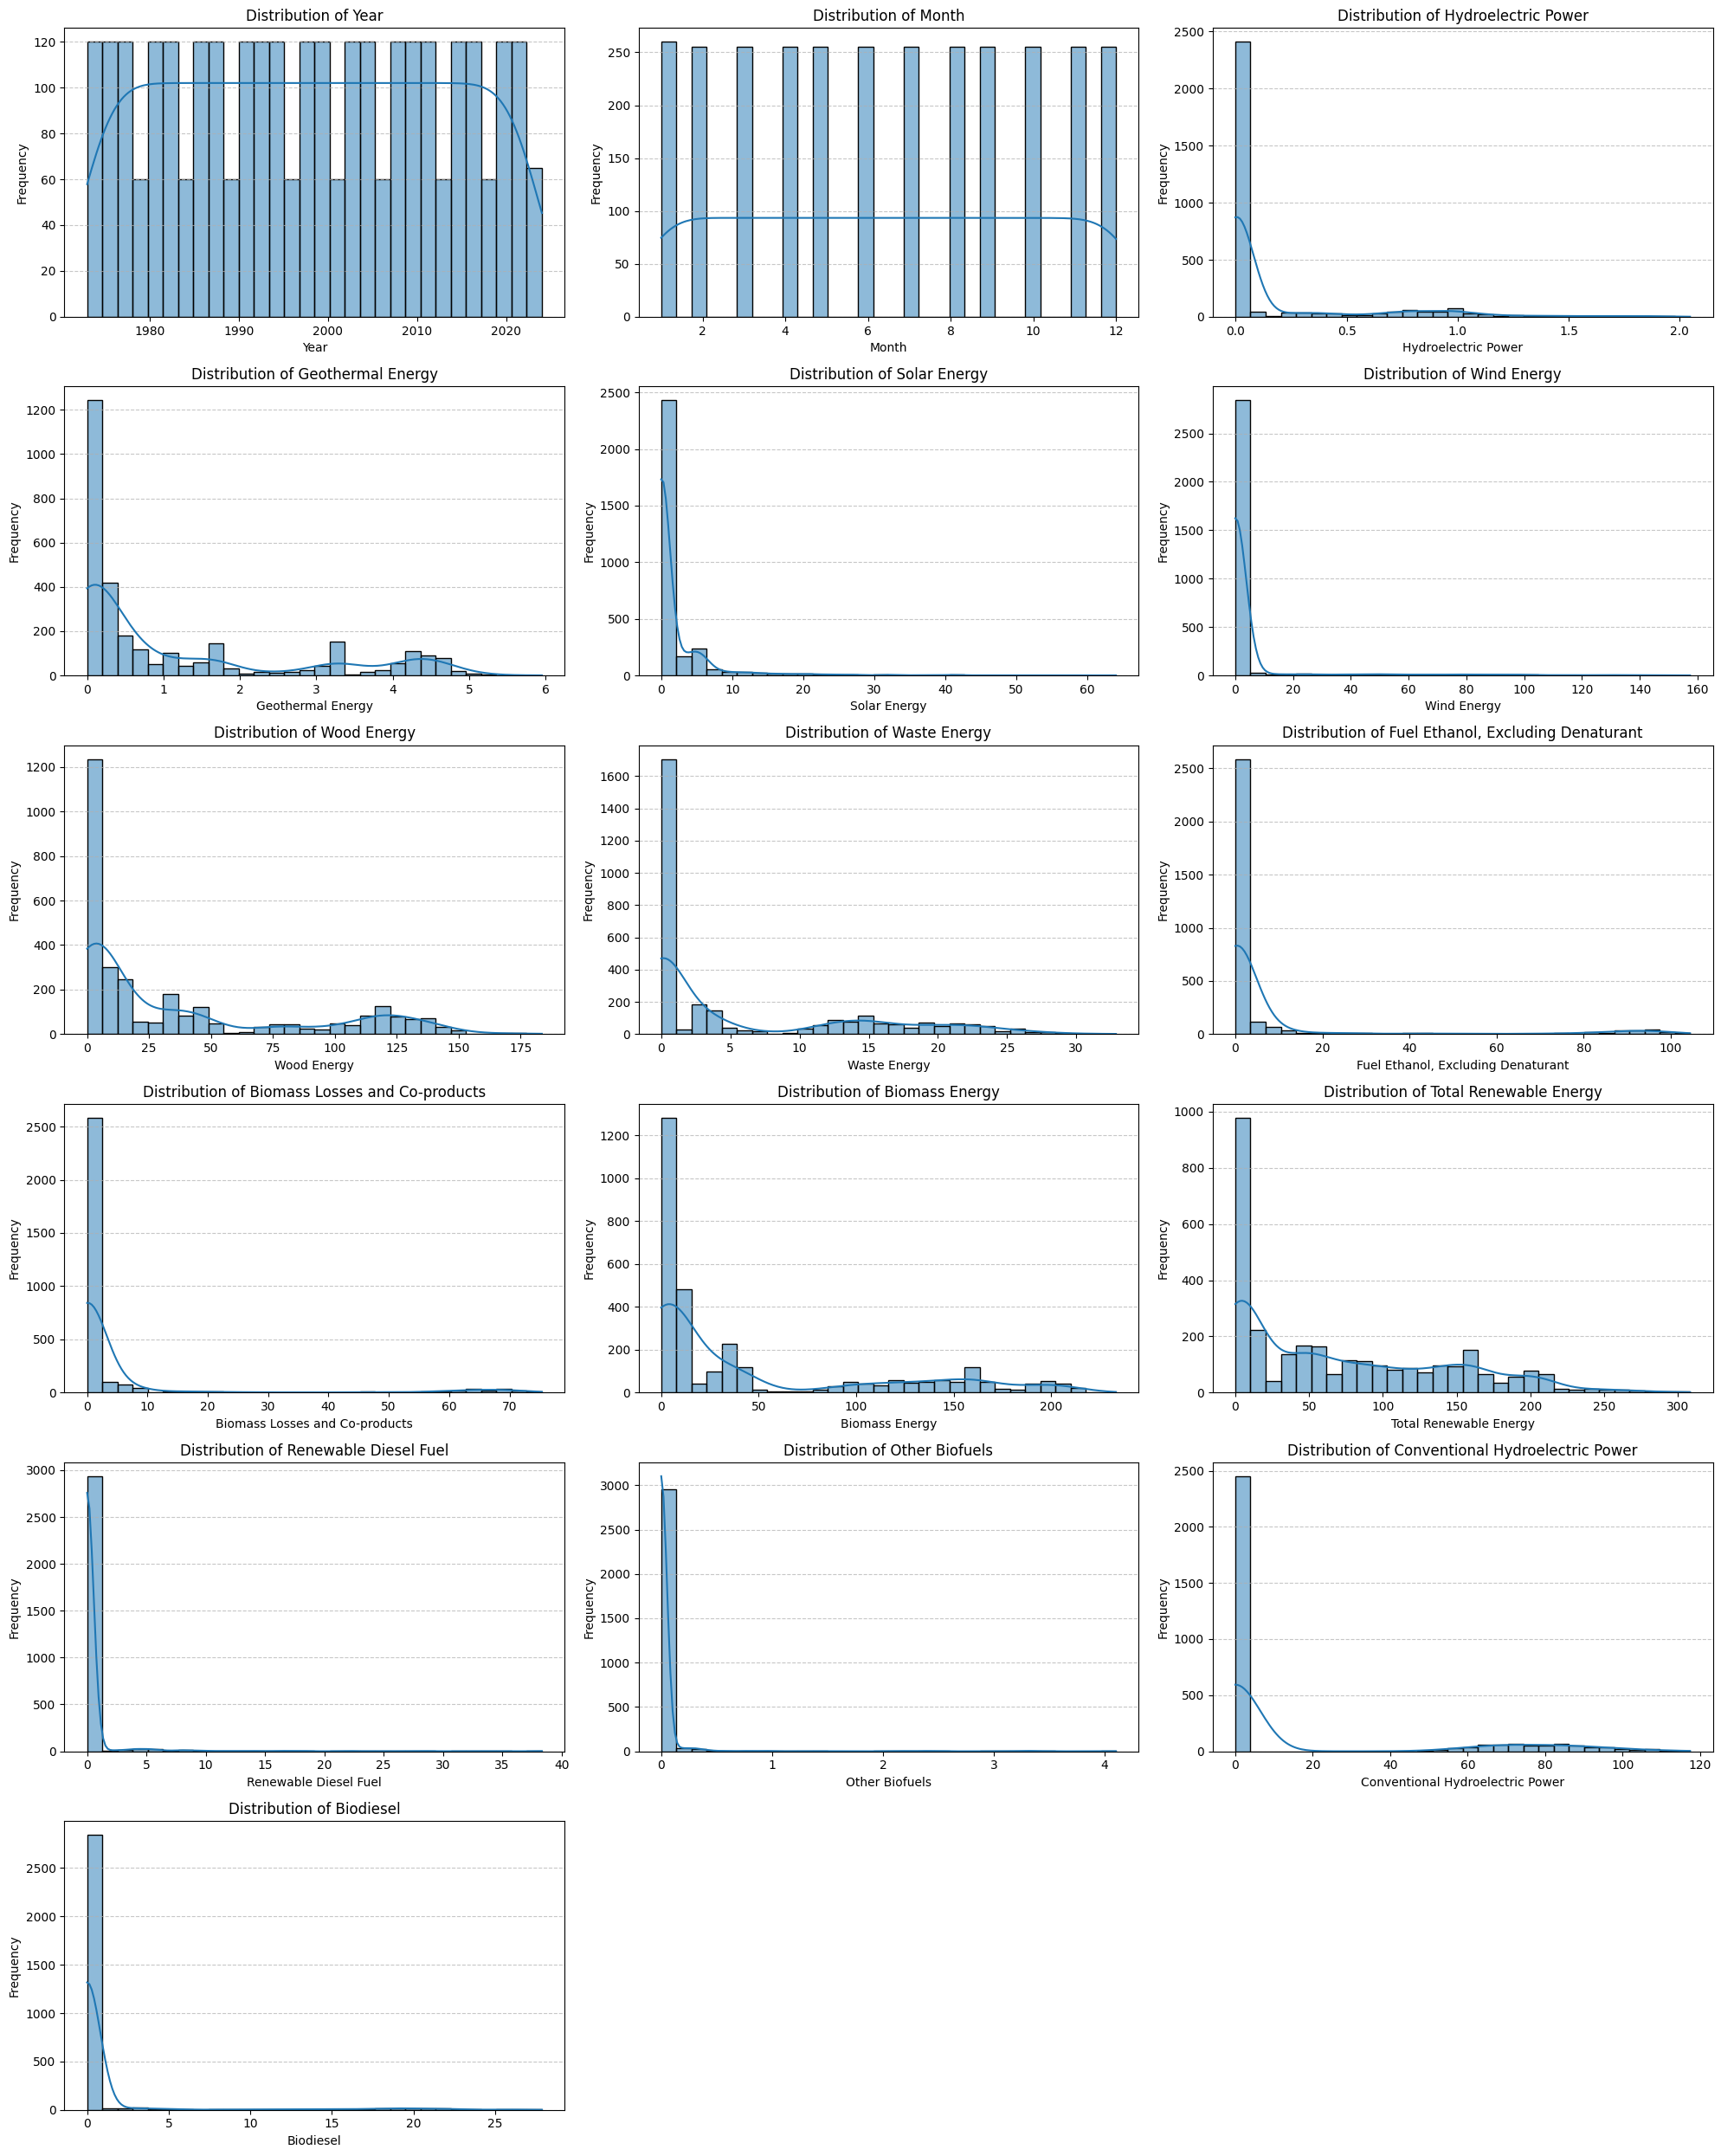

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

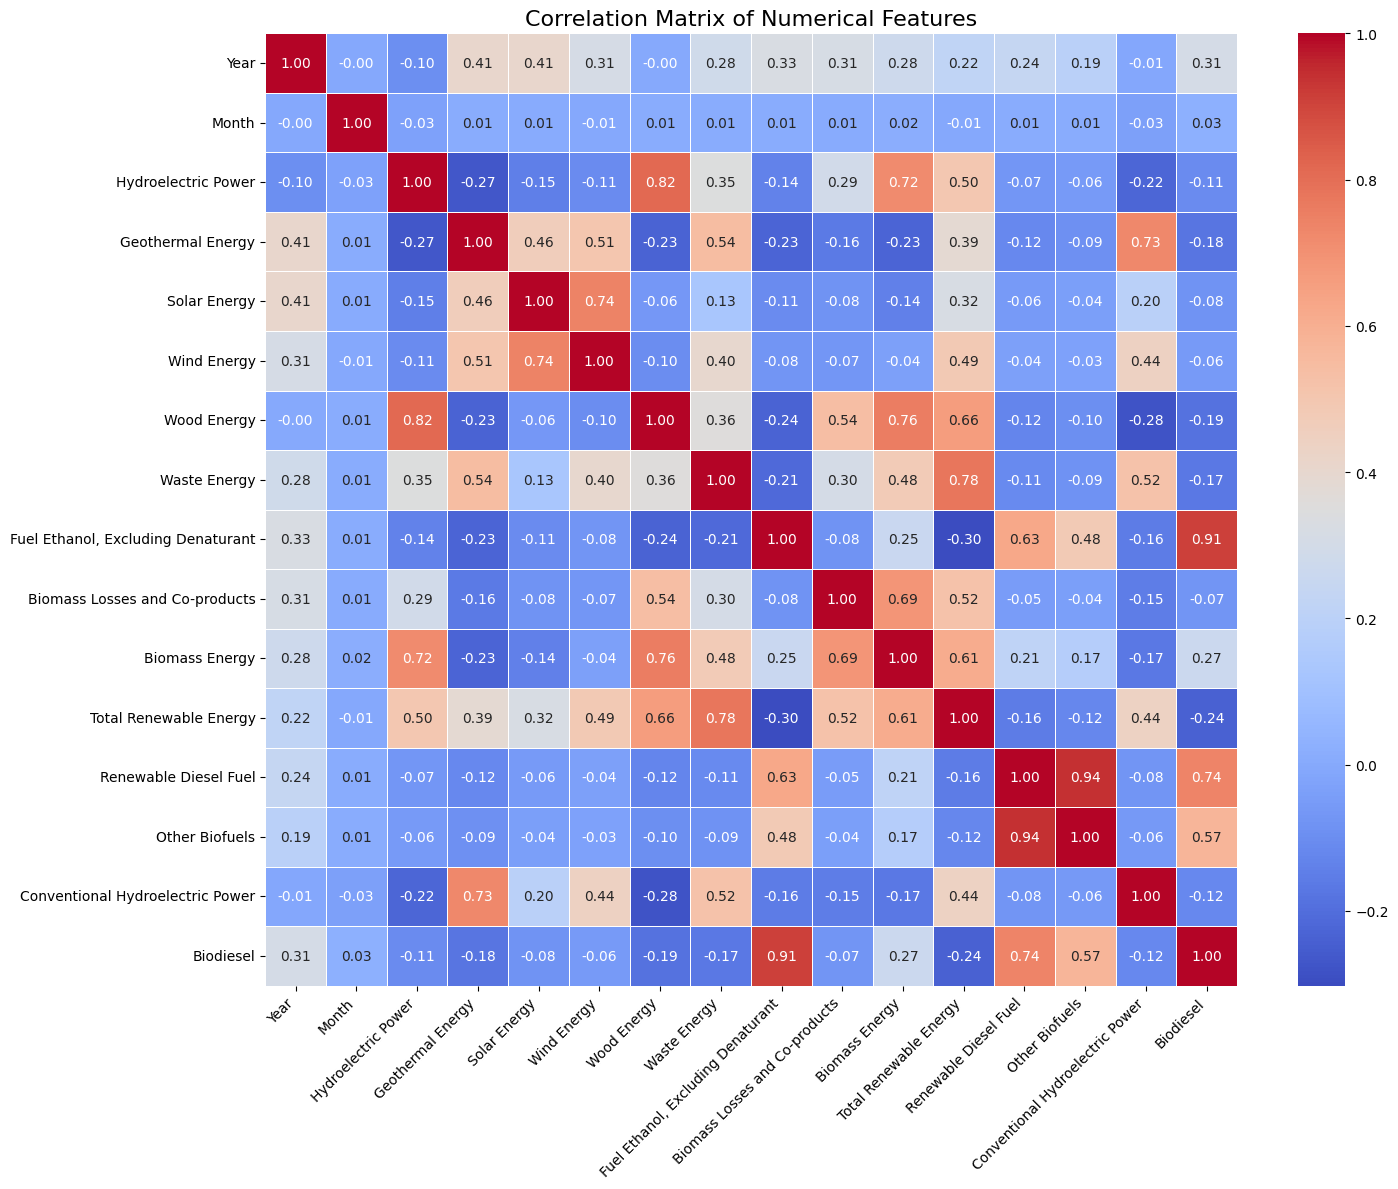

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

We will check for missing values.


In [ ]:
print("\n Number of missing values")
print(df.isnull().sum())


 Number of missing values
Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64


Encoding the Sector column


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sector'], drop_first=False)
print("Result")
print(df_encoded.head())
print(f"Shape: {df_encoded.shape}")

Result
   Year  Month  Hydroelectric Power  Geothermal Energy  Solar Energy  \
0  1973      1                 0.00               0.00           0.0   
1  1973      1                 0.00               0.49           0.0   
2  1973      1                 1.04               0.00           0.0   
3  1973      1                 0.00               0.00           0.0   
4  1973      1                 0.00               0.00           0.0   

   Wind Energy  Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0          0.0        0.570         0.000                                 0.0   
1          0.0        0.054         0.157                                 0.0   
2          0.0       98.933         0.000                                 0.0   
3          0.0       30.074         0.000                                 0.0   
4          0.0        0.000         0.000                                 0.0   

   Biomass Losses and Co-products  ...  Total Renewable Energy  \
0      

StandardScaler of the numerical values except Year and Month


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [col for col in df_encoded.select_dtypes(include=['number']).columns if col not in ['Year', 'Month']]

print(f"Columns to scale: {columns_to_scale}")

scaler = StandardScaler()

df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print("\nResult")
print(df_encoded.head())


Columns to scale: ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Biomass Energy', 'Total Renewable Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']

Result
   Year  Month  Hydroelectric Power  Geothermal Energy  Solar Energy  \
0  1973      1            -0.454194          -0.739305     -0.349006   
1  1973      1            -0.454194          -0.423299     -0.349006   
2  1973      1             2.328352          -0.739305     -0.349006   
3  1973      1            -0.454194          -0.739305     -0.349006   
4  1973      1            -0.454194          -0.739305     -0.349006   

   Wind Energy  Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0    -0.236312    -0.769292     -0.705811                           -0.318447   
1    -0.236312    -0.780296     -0.686771                       

#1st Part


In [ ]:
from sklearn.model_selection import train_test_split

y = df_encoded['Total Renewable Energy']

X = df_encoded.drop('Total Renewable Energy', axis=1)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shape of X: (3065, 20)
Shape of y: (3065,)
X_train shape: (2452, 20)
X_test shape: (613, 20)
y_train shape: (2452,)
y_test shape: (613,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

MSE: 0.0000
R2 Score: 1.0000


##Problem

How well can the Total Renewable Energy be predicted ?


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"New MSE: {mse_ridge:.4f}")
print(f"New R2 Score: {r2_ridge:.4f}")

New MSE: 0.0000
New R2 Score: 1.0000


Search for best alpha hyperparameter


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best alpha parameter: {grid_search.best_params_}")

print(f"Best R2 score : {grid_search.best_score_:.4f}")

Best alpha parameter: {'alpha': 0.001}
Best R2 score : 1.0000


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

optimal_ridge_estimator = Ridge(alpha=0.001)

bagging_model = BaggingRegressor(estimator=optimal_ridge_estimator, n_estimators=50, random_state=42, n_jobs=-1)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print(f"Bagging Regressor MSE: {mse_bagging:.4f}")
print(f"Bagging Regressor R2 Score: {r2_bagging:.4f}")

Bagging Regressor MSE: 0.0000
Bagging Regressor R2 Score: 1.0000


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


estimators = [
    ('ridge', optimal_ridge_estimator),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR())
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Regressor MSE: {mse_stacking:.4f}")
print(f"Stacking Regressor R2 Score: {r2_stacking:.4f}")

Stacking Regressor MSE: 0.0000
Stacking Regressor R2 Score: 1.0000


# 2nd Part

Can we predict the sector of industry based on each energy type's consumption


This plot visualizes the test data points in a 2D space (reduced by PCA) and colors them according to the `Predicted Sector` by the logistic regression model. Since the logistic regression model achieved perfect accuracy, you should observe perfectly separated clusters corresponding to each sector.

## Prediction of the sector

### Condensing the sectors in a single column again

In [ ]:
sector_cols_to_drop = [col for col in df_encoded.columns if col.startswith('Sector_')]

df_encoded['Sector'] = df_encoded[sector_cols_to_drop].idxmax(axis=1).apply(lambda x: x.replace('Sector_', ''))

df_encoded.drop(columns=sector_cols_to_drop, inplace=True)

print("df_encoded after consolidating sector columns:")
display(df_encoded.head())

print("\nValue counts for the new 'Sector' column:")
display(df_encoded['Sector'].value_counts())

df_encoded after consolidating sector columns:


,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Sector
0,1973,1,-0.454194,-0.739305,-0.349006,-0.236312,-0.769292,-0.705811,-0.318447,-0.309934,-0.711743,-0.987583,-0.159614,-0.12302,-0.490444,-0.239366,Commerical
1,1973,1,-0.454194,-0.423299,-0.349006,-0.236312,-0.780296,-0.686771,-0.318447,-0.309934,-0.717332,0.257786,-0.159614,-0.12302,2.264778,-0.239366,Electric Power
2,1973,1,2.328352,-0.739305,-0.349006,-0.236312,1.328314,-0.705811,-0.318447,-0.309934,0.819651,0.408799,-0.159614,-0.12302,-0.490444,-0.239366,Industrial
3,1973,1,-0.454194,-0.739305,-0.349006,-0.236312,-0.140115,-0.705811,-0.318447,-0.309934,-0.720617,-0.573120,-0.159614,-0.12302,-0.490444,-0.239366,Residential
4,1973,1,-0.454194,-0.739305,-0.349006,-0.236312,-0.781448,-0.705811,-0.318447,-0.309934,-0.720617,-0.995590,-0.159614,-0.12302,-0.490444,-0.239366,Transportation



Value counts for the new 'Sector' column:


,count
Sector,
Commerical,613
Electric Power,613
Industrial,613
Residential,613
Transportation,613


###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

X = df_encoded.drop(['Sector','Year', 'Month', 'Total Renewable Energy', 'Biomass Energy'], axis=1)

y = df_encoded['Sector']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

    Commerical       0.85      1.00      0.92       133
Electric Power       1.00      1.00      1.00       114
    Industrial       1.00      1.00      1.00       133
   Residential       1.00      1.00      1.00       123
Transportation       1.00      0.78      0.88       110

      accuracy                           0.96       613
     macro avg       0.97      0.96      0.96       613
  weighted avg       0.97      0.96      0.96       613



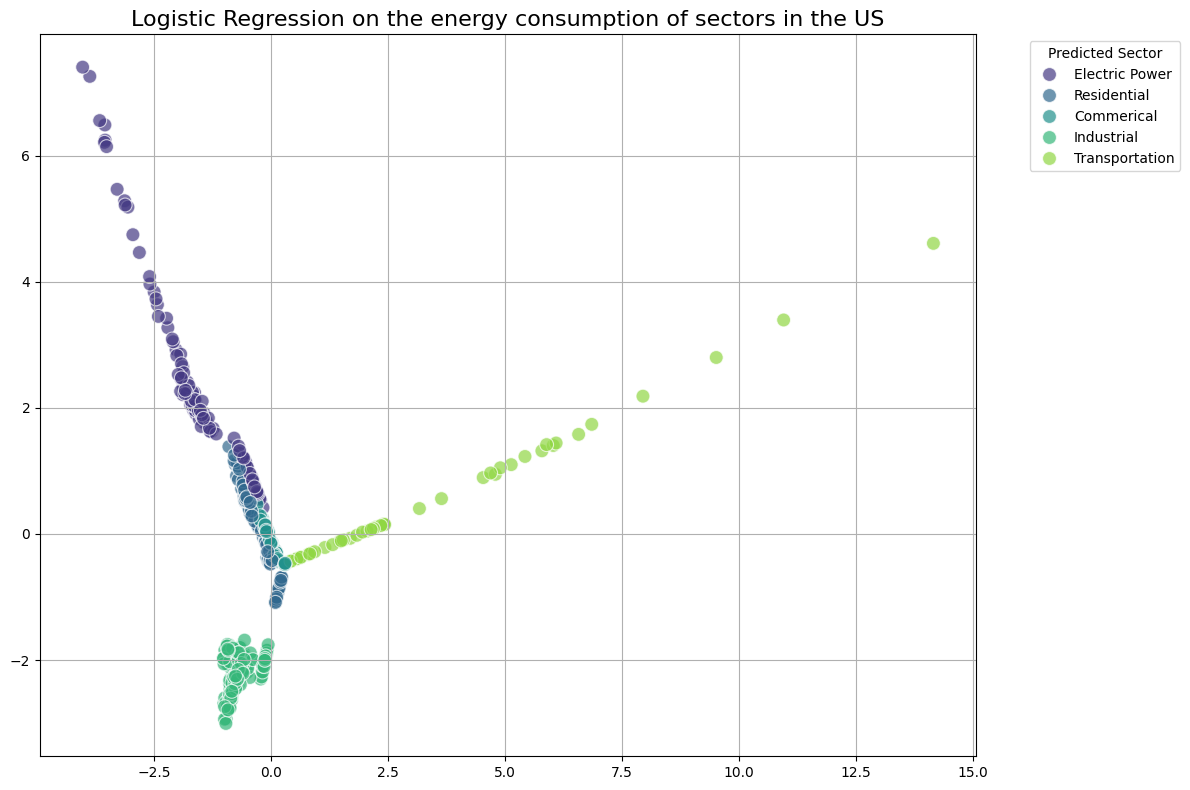

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
X_train_pca_logreg = pca.fit_transform(X_train)
X_test_pca_logreg = pca.transform(X_test)

pca_df_test_logreg = pd.DataFrame(data=X_test_pca_logreg, columns=['Principal Component 1', 'Principal Component 2'])
pca_df_test_logreg['Predicted Sector'] = pred

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Predicted Sector',
    data=pca_df_test_logreg,
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('Logistic Regression on the energy consumption of sectors in the US', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(title='Predicted Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Confusion Matrix for Sector Prediction

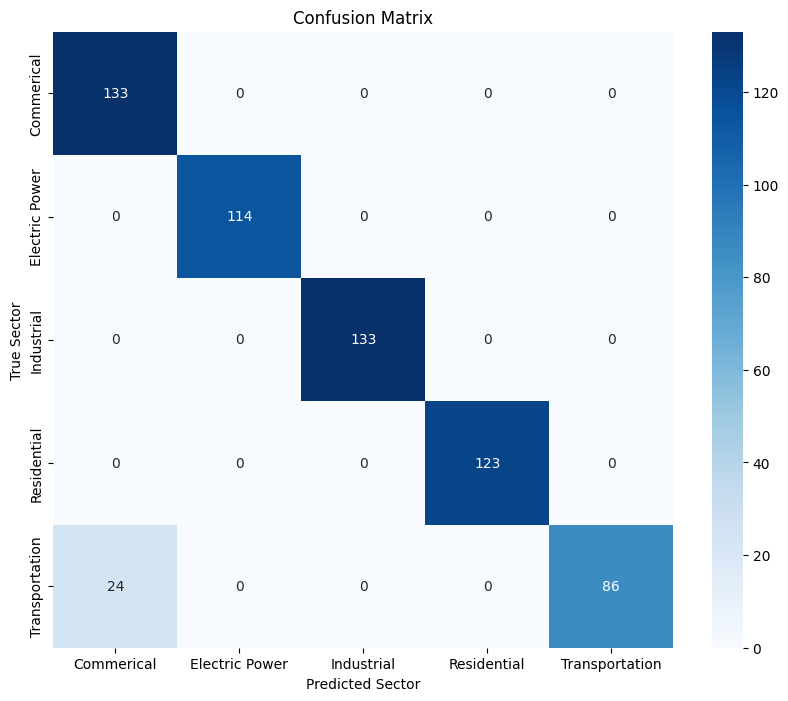

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

class_labels = model.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sector')
plt.ylabel('True Sector')
plt.show()